# Prosjekt: Simulering av Antibiotikaresistente Bakterier

Målet med dette prosjektet er å simulere evolusjon av antibiotika resistente bakterier og gjenskape et eksperiment gjort ved *Harvard Medical School*. Forklaringen av eksperimentet er utgangspunktet for modellen som skal brukes i dette prosjektet, så det er nødvendig å se videoen under før du går videre:

<iframe width="560" height="315" src="https://www.youtube.com/embed/plVk4NVIUh8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

Når du har løst prosjektet, vil du ha produsert simuleringer som gir resultater som i {numref}`bacteria`.


```{figure} ../../../codes/biology/antibiotic_resistant_bacteria/animations/animation_grid_500X250_iterations_5000.gif
---
name: bacteria
---

Animasjon av evolusjon av bakterier. Den rektangulære platen er delt opp i 5 soner med økende konsentrasjonsgrad med antibiotika. 
```

## Prosjektbeskrivelse

Du skal utvikle en Python-kode som simulerer bakterier i en petriskål der det er økende konsentrasjonsgrad av antibiotika i ulike soner, slik som i eksperimentet ved Harvard Medical School. Numeriske simuleringer har i stor grad fått stor plass som en form for eksperiment der man tester ut modeller med simuleringer for å studere egenskapene til modellen og sjekke om de samsvarer med observasjoner i naturen. Relatert til evolusjonsteorien, er det spesielt to betingelser som må være tilstede for at genforrådet til en art skal endre seg slik at vi observerer evolusjon:

1. **Genetisk variasjon**. Vi trenger et genforråd som har eller kan skape gener som gir forskjellige egenskaper hos arten. Mutasjon er en viktig komponent her, siden genforrådet kan endres ved at DNA til individer i en populasjon muterer og dermed endres.
2. **Variasjon i miljø**. Vi trenger et miljø som arten lever i der noen gener gir individer egenskaper som gir de en fordel med tanke på å overleve og reprodusere seg over andre individer i arten. 

Som mål skal du blant lage en animasjon og en figur som kartlegger populasjonsveksten over tid.

## Modell for bakterien

Her skal du sette opp modellen for bakterien og legge grunnlaget for simulering ved å skrive mindre funksjoner som løser deler av problemet. Til slutt skal du sy det sammen og simulere et system av mange bakterier. 

### En modell for bakterien og kode for modellen

Tenk deg at bakteriene levere i på en rektangulær plate. Tenk deg at vi deler opp langsiden i $L$ deler og kortsiden i $K$ deler. Tilsammen kan vi da tenke oss at det finnes $L \times K$ ruter som vi kan plassere en bakterie på. 

Når man skal sette lage en modell for et fysisk system, er første steg å forenkle og velge ut relevante variabler som vi tror har en effekt på hvordan systemet fungerer. I dette tilfellet er det fysiske systemet en bakterie. Hvis vi tenker oss om, bør vi i det minste passe på å ha en modell som fanger opp vanlige egenskaper hos en bakterie:

1. **Bevegelse**: Modellen for bakteriene må sørge for at bakteriene kan flytte seg rundt på en måte som replikerer bevegelsesmønstre til bakterier.
2. **Antibiotikaresistens**: Modellen for bakterien må ha en måte å representere antibiotikaresistens på.
3. **Dødsfall**: Bakteriene er nødt til å kunne dø i populasjonen.
4. **Reproduksjon**: Modellen for bakteriene må ta hensyn til at bakteriene kan reprodusere gjennom ukjønnet formering.
5. **Mutasjon**: Bakteriene må kunne undergå genetiske mutasjoner slik at genetisk variasjon kan forekomme i populasjonen av bakterier.

### Bevegelse

Modellen for bakteriene må sørge for at forflytningen til bakteriene reflekterer hvordan **ekte** bakterier beveger seg. I praksis, vil bevegelsesmønsteret til bakterier opptre som svært tilfeldig. En enkel modell for bevegelsen til bakterien er derfor å generere hvilken retningen den går som **helt tilfeldig**. Det viser seg at dette garanterer at bakterien vil besøke alle mulige posisjoner på den rektangulære platen, et resultat som følger fra den matematisk teorien for **virrevandring**. Du kan derfor flytte bakteriene rundt helt tilfeldig. 

Siden bakterien lever på en rektangulær plate med $n_x$ posisjoner langs langsiden og $n_y$ posisjoner langs kortsiden, vil bakterien kunne leve på $n_x \times n_y$ ruter/celler i "Universet" til bakteriene. La oss kalle langsiden for $x$-retning og kortsiden for $y$-retning. Da kan bakterien ha posisjoner langs $x$-aksen med verdiene 

$$
x = 0, 1, 2, 3, \ldots, n_x - 1,
$$

og langs $y$-aksen 

$$
y = 0, 1, 2, 3, \ldots, n_y - 1.
$$

Vi kan derfor assosiere et koordinat $(x, y)$ som en beskrivelse av posisjonen til en bakterie på den rektangulære platen. 

Det er naturlig å benytte seg av et objekt i Python som heter *dictionary*, med datatype `dict`, som kan lagre denne informasjonen på følgende måte:

In [2]:
bakterie = {
    "x": 2,
    "y": 3,
}

I eksemplet her er `bakerie` plassert i koordinatet $(2, 3)$. Med andre ord er $x = 2$ og $y = 3$.
Hvis vi antar at bakterien **kun** kan flytte seg én plass av gangen i $x$- og $y$-retning, vil vi kunne flytte bakterien på følgende måte:

In [3]:
import numpy as np # bibliotek for numerisk matte
bakterie["x"] += np.random.randint(-1, 2) # Trekker tilfeldig en av tallene -1, 0 eller 1.
bakterie["y"] += np.random.randint(-1, 2)
print(bakterie)

{'x': 2, 'y': 3}


Vi kan også hente ut dataen som er lagret i `bakterie` slik:

In [4]:
x = bakterie.get("x")
y = bakterie.get("y")

print(f"{x = }")
print(f"{y = }")

x = 2
y = 3


#### Modell for antibiotikaresistens

Vi må ha en måte å inkludere antibiotikaresistens i modellen for bakteriene. Vi skal gå for en enkel løsning der vi modellerer en bakterie sin grad av antibiotikaresistens som et tall mellom 0 og 1, der 0 representerer *ingen* antibiotikaresistens og 1 representerer 100% antibiotikaresistens.

Vi kan derfor utvide måten vi lagrer informasjon om bakterien. En bakterie med ingen antibiotikaresistens kan for eksempel lages slik:


In [5]:
bakterie = {
    "x": 2,
    "y": 3,
    "resistens": 0,
}

På samme måte som før, kan vi både endre og hente ut antibiotikaresistensen fra `bakterie`:

In [6]:
bakterie["resistens"] += 0.1 # Øker antibiotikaresistens med 0.1
resistens = bakterie.get("resistens") # Henter ut antibiotikaresistens fra bakterien 
print(f"{resistens = }")

resistens = 0.1


#### Konsentrasjonsgrad av antibiotika og effekten på bakterien

Vi kan modellere konsentrasjonsgrad av antibiotika på akkurat samme måte som vi modellerer antibiotikaresistens hos bakterien. Lar vi konsentrasjonen være et tall mellom 0 og 1 på ulike områder på den rektangulære platen, akkurat som i eksperimentet ved Harvard Medical School, så får vi gjenskapt miljøvariasjonen de hadde. Vi trenger i praksis da en funksjon som har såkalt *delt forskrift*. La konsentrasjon være en funksjon $K(x)$. Da kan den være på formen

$$
K(x) = 
\begin{cases}
    0, \qquad 0 \leq x < 0.2 n_x, \\
    0.25, \qquad 0.2 n_x \leq x < 0.4 n_x, \\
    0.5, \qquad 0.4 n_x \leq x < 0.6 n_x, \\
    0.75, \qquad 0.6 n_x \leq x < 0.8 n_x, \\
    0.99, \qquad 0.8 n_x \leq x < n_x, \\
\end{cases}
$$
der $x$ er $x$-koordinaten til bakterien.
Da vil vi ha **fem soner** med økende grad av antibiotikakonsentasjon. For å sjekke hvilken konsentrasjon en gitt bakterie lever i, kan du bruke en Pythonfunksjon som tar inn bakterien sin $x$-koordinat og returnerer antibiotikakonsentrasjonen.

*For å lage en slik funksjon, kan du ta utgangspunkt i kodeskallet under. Du må fylle inn der det står `NotImplemented`*

In [ ]:
def antibiotika_konsentrasjon(x, nx):
    if 0 <= x < 0.2*nx:
        return 0
    elif 0.2*nx <= x < 0.4*nx:
        return 0.25
    elif NotImplemented:
        return NotImplemented
    elif NotImplemented:
        return NotImplemented
    else:
        return NotImplemented

````{dropdown} Løsningsforslag

```python
def antibiotika_konsentrasjon(x, nx):
    if 0 <= x < 0.2*nx:
        return 0
    elif 0.2*nx <= x < 0.4*nx:
        return 0.25
    elif 0.4*nx <= x < 0.6*nx:
        return 0.5
    elif 0.6*nx <= x < 0.8*nx:
        return 0.75
    else:
        return 0.99
```

````

### Hvordan dør bakteriene?

Bakterier har ingen form for alderdom, så i en modell for bakterien, holder at vi sjekker om antibiotikaresistensen tar livet av bakterien eller ikke. 
La $r$ være antibiotikaresistensen til en bakterie og $x$ være den posisjon, og $K(x)$ være konsentrasjon av antibiotika i $x$. En logisk måte å modellere hvorvidt en bakterie skal dø er slik:

1. Dersom konsentrasjonen er mindre enn eller lik resistensen, så overlever bakterien uansett.
2. Dersom konsentrasjonen er større enn resistensen, så har bakterien en viss sjanse for å overleve og en viss sjanse for å dø. Jo større forskjellen er mellom resistensen og konsentrasjonen, jo høyere er sjansen for å dø. 

Punkt nr. 2 kan oppnås ved å benytte seg av noe som kalles for **slice sampling**. 

```{prf:algorithm} Bakteriedrap
:nonumber:

**Input** Antibitiokaresistens $r$, posisjon $x$


1. Regn ut konsentrasjon av antibiotika i $x$ med $K(x)$.
2. Hvis $r \geq K(x)$, så overlever bakterien.
3. Hvis $r < K(x)$:
    - Trekk et tilfeldig tall $u$ mellom 0 og 1.
    - Dersom $u \geq K(x) - r$, så overlever bakterien. Hvis ikke dør den.
```

*Du ta utgangspunkt i kodeskallet for en funksjon `bakteriedrap` som implementerer denne algoritmen. Du må fylle inn der det står `NotImplemented`.*

In [9]:
import numpy as np # må importeres for å kunne bruke funksjonen.
def bakteriedrap(bakterie):
    """Tar inn en bakterie sjekker om den skal dø. 
    Returnerer `False` hvis bakterien skal overleve, og `True` hvis den skal dø.
    """
    x = bakterie.get("x")
    resistens = bakterie.get("resistens")
    if resistens >= antibiotika_konsentrasjon(x):
        return False # Returner false, ikke drep bakterien!
    else:
        u = np.random.uniform() # tilfeldig tall mellom 0 og 1.
        if NotImplemented:
            return NotImplemented
        else:
            return NotImplemented

````{dropdown} Løsningsforslag

```python
import numpy as np # må importeres for å kunne bruke funksjonen.
def bakteriedrap(bakterie):
    """Tar inn en bakterie sjekker om den skal dø. 
    Returnerer `False` hvis bakterien skal overleve, og `True` hvis den skal dø.
    """
    x = bakterie.get("x")
    resistens = bakterie.get("resistens")
    if resistens >= antibiotika_konsentrasjon(x):
        return False # Returner false, ikke drep bakterien!
    else:
        u = np.random.uniform() # tilfeldig tall mellom 0 og 1.
        if u >= antibiotika_konsentrasjon(x) - resistens:
            return False # Ikke drep bakterien
        else:
            return True # Drep bakterien
```

````

### Hvordan lagre flere bakterier av gangen? 

Hvis vi skal få simulert tidsutviklingen til en populasjon av bakterier som kan variere i størrelse, er vi nødt til å ha en måte å lagre flere bakterier på én gang. Vi trenger en **beholder** vi kan plassere mange `bakterie`-objekter inn i. Vi har allerede benyttet én type beholder så langt for å lagre informasjon om én bakterie med en `dict`, men når vi ikke bryr oss om å navngi inneholdet i beholderen, er det mer naturlig å bruke en liste som i Python har datatypen `list`. 

For eksempel kan vi lagre to bakterier slik:

In [10]:
bakterier = [
    {
        "x": 2, 
        "y": 3, 
        "resistens": 0
    },
    {
        "x": 3,
        "y": 5,
        "resistens": 0.1
    }
]

Vi kan da printe ut alle informasjonen om bakteriene slik:

In [16]:
print(*bakterier, sep="\n")

{'x': 2, 'y': 3, 'resistens': 0}
{'x': 3, 'y': 5, 'resistens': 0.1}


Men hvis vi skal ha svært mange bakterier, er det greit om vi kan benytte oss av en bedre løsning for å skrive inn bakteriene. Det er naturlig å tilfeldig generere posisjonene til bakteriene (men passe på at de starter i sonen uten antibiotika, dvs. sone 0) og sette `resistens=0` i starten av simuleringen. 

Under ser du et eksempel på hvordan dette kan gjøres ved å sette inn 5 bakterier på tilfeldig posisjoner i sone 0 ($0 \leq x < 0.2n_x$), der $n_x = 200$ og $n_y = 100$.

In [19]:
import numpy as np # nødvendig python bibliotek for å trekke tilfeldige tall. Plasseres på toppen av koden din
antall_bakterier = 5
nx = 200 # Antall celler i x-retning
ny = 100 # Antall celler i y-retning
bakterier = [
    {"x": np.random.randint(0, 0.2*nx), "y": np.random.randint(0, ny), "resistens": 0} for _ in range(antall_bakterier)
]
print(*bakterier, sep="\n")

{'x': 29, 'y': 60, 'resistens': 0}
{'x': 10, 'y': 25, 'resistens': 0}
{'x': 12, 'y': 19, 'resistens': 0}
{'x': 3, 'y': 92, 'resistens': 0}
{'x': 2, 'y': 27, 'resistens': 0}


### Reproduksjon

En egenskap vi må ta hensyn til i en populasjon av bakterier er at når antall bakterier i populasjonen blir svært høy (og nærmer seg det maksimale antallet individer som kan overleve i økosystemet), så vil sannsynligheten for at en bakterie i populasjon får reprodusere bli svært lav. Dersom det er få individerer i populasjonen, derimot, vil sannsynligheten for reproduksjon av en tilfeldig bakterie være høy. Vi forventer at populasjonen følger en logistisk vekst, og vi kan sørge for at populasjonsveksten tilfredstiller en slik modell ved å benytte en sannsynlighetsfordeling for at en tilfeldig bakterie reproduserer, som følger:

$$
p(n) = 2\left( 1 - \frac{1}{1 + e^{-b\cdot n}} \right), \qquad n \geq 0,
$$

der $n$ er antall individerer i bakteriepopulasjonen og $b$ er en parameter som bestemmer bæreevnene til populasjonen.

Vi kan ta en titt på hvordan denne fordelingen ser ut:

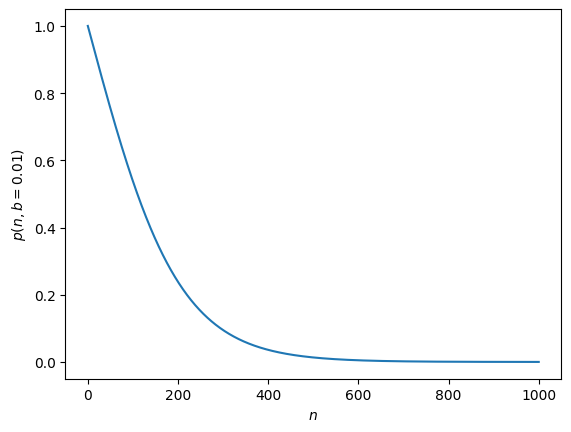

In [7]:
import matplotlib.pyplot as plt
import numpy as np
def p(n, b):
    return 2 * (1 - 1/(1 + np.exp(-b*n)))

n = np.linspace(0, 1000, 1000)
plt.plot(n, p(n, b=0.01))
plt.xlabel("$n$")
plt.ylabel("$p(n, b=0.01)$")
plt.show()

#### Hvordan sjekke om en bakterie kan reprodusere?

For å sjekke om en bakterie kan reprodusere, må du hente ut hvor mange bakterier som er i populasjonen. Vi skal se på hvordan vi gjør det senere. For nå, la oss bare anta at antall bakterier i populasjonen er $n$. For å sjekke om en bakterie for reprodusere, trekker vi da et tilfeldig tall $u$ mellom $0$ og $1$ (som vi kan gjøre med `u = np.random.uniform()`). Da gjelder følgende:

1. Hvis $p(n) > u$ så får bakterien reprodusert.
2. Hvis ikke er det for vanskelig for bakterien å reprodusere, og ingen reproduksjon vil skje.

### En algoritme for tidsutviklingen av bakteriene

Nå har vi satt sammen modellen som gir oss grunnlaget for å lage en algoritme for tidsutviklingen til bakteriene. Tidsutviklingen av bakteriepopulasjonen kan simuleres med {prf:ref}`bakteriepopulasjon`. Den inneholder alle de grunnleggende stegene vi må gjennom. Hvert tidssteg $t$ kan tenkes på som hvilken generasjon vi er på i bakteriepopulasjonen. 

```{prf:algorithm} Tidsutvikling av bakteriepopulasjon
:label: bakteriepopulasjon

**Input**: Antall bakterier $N$, antall tidssteg $T$.

1. Lag $N$ bakterier.
2. for $t = 0, 1, 2, ..., T$:
    - for hver bakterie $b$:
        - Flytt $b$ én plass i en tilfeldig retning.
        - Oppdater posisjonen til alle bakteriene.
        - Hvis $b$ kan reprodusere:
            - Lag en ny bakterie $b'$ med samme posisjon som $b$.
            - Legg $b'$ til i bakteriepopulasjonen.
        - Hvis $b$ skal dø:
            - Fjern $b$ fra bakteriepopulasjonen.
```

## Prosjektmål

Når man skriver en kode for større prosjekter, er det god kodepraksis å skrive funksjoner som gjør én spesifikk bit av algoritmen. Deretter vil hovedkoden bestå av kall til funksjonene i riktig rekkefølge for å gjennomføre algoritmen. En fordel med dette er at du kan teste hver funksjon for seg, og du kan gjenbruke funksjonene i andre prosjekter. Hvis noe går galt i koden, er det også lettere å finne ut hvor feilen ligger.

Fra {prf:ref}`bakteriepopulasjon` kan vi se at vi trenger funksjoner for å:

1. Lage $N$ bakterier til å starte med.
    - Trengs underliggende funksjon som lager én bakterie. 
2. Flytte en bakterie én plass.
3. Sjekke om en bakterie kan reprodusere.
4. Sjekke om en bakterie skal dø.
5. Fjerne en bakterie fra populasjonen.


*Under finner du et kodeskall for å løse prosjektet. Du kan bruke det som utgangspunkt for å løse prosjektet, eller du kan lage din egen kode fra bunnen av. I kodeskallet må du fylle inn alle plasser det står `NotImplemented` eller `pass`* 

In [8]:
def lag_bakterie(x: int, y: int, resistens: float) -> dict:
    return NotImplemented

In [16]:
def lag_bakterie(x: int, y: int, resistens: float) -> dict:
    return {"x": x, "y": y, "resistens": resistens}

In [9]:
def lag_populasjon(antall_bakterier: int, nx: int, ny: int) -> list:
    return NotImplemented

In [17]:
def lag_populasjon(antall_bakterier: int, nx: int, ny: int) -> list:
    return [
        lag_bakterie(
            x=np.random.randint(0, nx),
            y=np.random.randint(0, ny),
            resistens=0,
        ) 
        for _ in range(antall_bakterier)
    ]

In [10]:
import numpy as np # nødvendig python bibliotek for å trekke tilfeldige tall. Plasseres på toppen av koden din
def flytt(bakterie: dict, nx: int, ny: int) -> dict:
    return NotImplemented

In [19]:
def flytt(bakterie: dict, nx: int, ny: int) -> dict:
    x = bakterie.get("x")
    y = bakterie.get("y")
    dx = np.random.randint(-1, 2)
    dy = np.random.randint(-1, 2)

    if x + dx < 0:
        dx = 0
    elif x + dx >= nx:
        dx = 0
    
    if y + dy < 0:
        dy = 0
    elif y + dy >= ny:
        dy = 0
    
    bakterie["x"] += dx
    bakterie["y"] += dy
    return bakterie

In [13]:
import numpy as np # må importeres for å kunne bruke funksjonen. Plasseres på toppen av koden din.
def bakteriedrap(bakterie):
    """Tar inn en bakterie sjekker om den skal dø. 
    Returnerer `False` hvis bakterien skal overleve, og `True` hvis den skal dø.
    """
    x = bakterie.get("x")
    resistens = bakterie.get("resistens")
    if resistens >= antibiotika_konsentrasjon(x):
        return False # Returner false, ikke drep bakterien!
    else:
        u = np.random.uniform() # tilfeldig tall mellom 0 og 1.
        if NotImplemented:
            return NotImplemented
        else:
            return NotImplemented

In [21]:
import numpy as np # må importeres for å kunne bruke funksjonen. Plasseres på toppen av koden din.
def bakteriedrap(bakterie):
    """Tar inn en bakterie sjekker om den skal dø. 
    Returnerer `False` hvis bakterien skal overleve, og `True` hvis den skal dø.
    """
    x = bakterie.get("x")
    resistens = bakterie.get("resistens")
    if resistens >= antibiotika_konsentrasjon(x):
        return False # Returner false, ikke drep bakterien!
    else:
        u = np.random.uniform() # tilfeldig tall mellom 0 og 1.
        if u >= antibiotika_konsentrasjon(x) - resistens:
            return False # Bakterien overlever
        else:
            return True # Bakterien dør

In [14]:
import numpy as np # Plasser import statement på toppen av koden din.
def p(n, b):
    return NotImplemented

In [22]:
import numpy as np # Plasser import statement på toppen av koden din.
def p(n, b):
    return 2 * (1 - 1/(1 + np.exp(-b*n)))

In [15]:
from tqdm import trange # gir en progresjonsbar på for-løkka så man ser hvor langt man har kommet og har igjen.
def main(
        antall_bakterier: int,
        nx: int,
        ny: int,
        n_tidssteg: int,
        mutasjon_sannsynlighet: float,
    ) -> None:
    bakterier = lag_populasjon(antall_bakterier=antall_bakterier, nx=nx, ny=ny)
    
    x = [] # Liste som lagrer `x`-posisjonen til alle bakteriene ved hvert tidssteg. 
    y = [] # Liste som lagrer `y`-posisjonen til alle bakteriene ved hvert tidssteg.
    for _ in trange(n_tidssteg):
        x_tmp = [] # Skal hente ut `x`-posisjonen til alle bakteriene på dette tidssteg og legges inn i `x`-lista. 
        y_tmp = [] # Skal hente ut `y`-posisjjonen til alle bakteriene på dette tidssteg og legges inn i `y`-lista.

        nye_bakterier = [] # Nye som skal legges til i populasjonen lagres her midlertidig.
        for bakterie in bakterier:
            # Først lagre posisjonen til bakterien for animasjonen.
            x_tmp.append(bakterie.get("x"))
            y_tmp.append(bakterie.get("y"))

            bakterie = flytt(bakterie, nx=nx, ny=ny) # Flytt bakterien først

            # Sjekk om bakterien kan reprodusere.
            n = len(bakterier)
            if p(n=n, b=0.001) >= np.random.uniform(): # Sjekk om bakterien kan reprodusere.
                nye_bakterier.append(
                    lag_bakterie(
                        x=bakterie.get("x"),
                        y=bakterie.get("y"),
                        resistens=bakterie.get("resistens"),
                    )
                )
    
            if bakteriedrap(bakterie) is True:
                pass # fjern bakterien fra populasjonen


            
             